#  California Housing Prices

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

<img src='https://kaggle2.blob.core.windows.net/datasets-images/5227/7876/3d18388d350d2791f4121a232acce097/dataset-cover.jpg?t=2017-11-24-13-55-38'>

>The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

>>longitude

>>latitude

>>housing_median_age

>>total_rooms

>>total_bedrooms

>>population

>>households


>>median_income

>>median_house_value

>>ocean_proximity

<h3 }>The aim is to predict the median house price value for each district</h3>

### Importing libraires and resources

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import  ElasticNet
from sklearn.linear_model import  Ridge
from sklearn.model_selection import cross_val_score
import  statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import  Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib
from sklearn.decomposition import  PCA
from sklearn.cluster import  KMeans

%matplotlib inline

### Importing data 

In [2]:
#importing data
df=pd.read_csv('housing.csv')

print('the number of rows and colums are'+str(df.shape))

print('\nthe columns are - \n')
[print(i,end='.\t\n') for i in df.columns.values]




the number of rows and colums are(20640, 10)

the columns are - 

longitude.	
latitude.	
housing_median_age.	
total_rooms.	
total_bedrooms.	
population.	
households.	
median_income.	
ocean_proximity.	
median_house_value.	


[None, None, None, None, None, None, None, None, None, None]

> we can see that median house values are continuous and hence its a regression problem

>we have onne categorical feature (ocean_proximity)

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


### Missing Values
- here yellow stripes shows that 'total bedroooms feature is  having  missing values of frequency= 207

In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

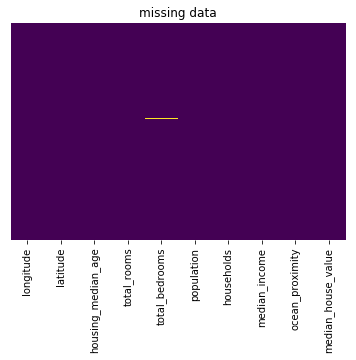

In [5]:


df.isnull().sum()
sns.heatmap(df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

plt.title('missing data')
plt.show()

>statistics for missing value feature
- average is 537 for total bedrooms
- first quartile is highly low compared to other two

In [6]:
#statistics of missing values column
df['total_bedrooms'].describe()




count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

Text(0,0.5,'frequency')

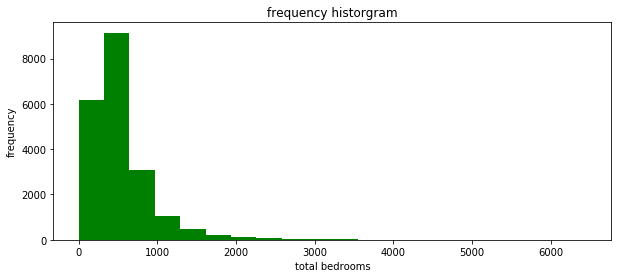

In [7]:
plt.figure(figsize=(10,4))
plt.hist(df[df['total_bedrooms'].notnull()]['total_bedrooms'],bins=20,color='green')#histogram of totalbedrooms
#data has some outliers
(df['total_bedrooms']>4000).sum()
plt.title('frequency historgram')
plt.xlabel('total bedrooms')
plt.ylabel('frequency')

The data has too much outliers and hence filling with mean will affect the prediction

<function matplotlib.pyplot.plot>

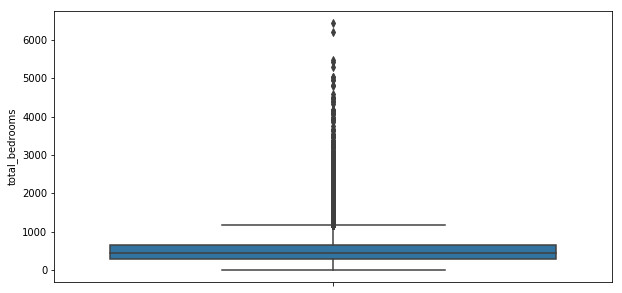

In [8]:
# boxplot on total_bedrooms
plt.figure(figsize=(10,5))
sns.boxplot(y='total_bedrooms',data=df)
plt.plot

> since there are alot of outliers hence we should use median to fill missing values

#### we can fill missing values according to a categorical column
#### ocean_proximity is the categorical column

In [9]:


#we will calculate the median for total_bedrooms based  upon categories of ocean_proximity column
def calc_categorical_median(x):
    """this function fill the missing values of total_bedrooms based upon categories of ocean_proximity"""
    unique_colums_ocean_proximity=x['ocean_proximity'].unique()
    for i in unique_colums_ocean_proximity:
        median=x[x['ocean_proximity']==i]['total_bedrooms'].median()
        x.loc[x['ocean_proximity']==i,'total_bedrooms'] =  x[x['ocean_proximity']==i]['total_bedrooms'].fillna(median)
calc_categorical_median(df)





In [10]:
#checking missing values again
print(df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64


In [11]:
#dtypes
print(df.dtypes)

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object


# EDA
>statistics of each column

In [12]:

df.describe()




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.852229,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.390765,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
# sns.pairplot(df)

##### histogram of dependent feature


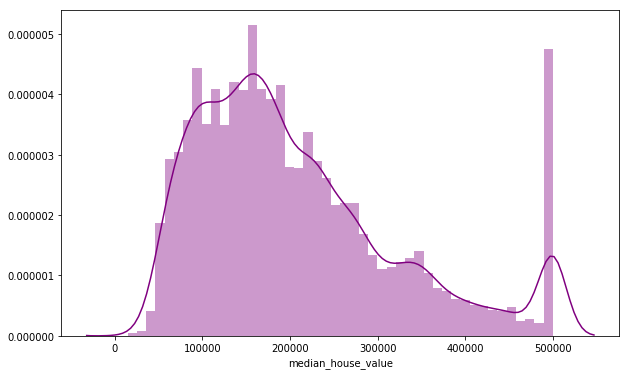

In [14]:
#we can see that area where median price frequencey for >= 500000 is more and could be a outlier or wrong data

plt.figure(figsize=(10,6))
sns.distplot(df['median_house_value'],color='purple')
plt.show()


[]

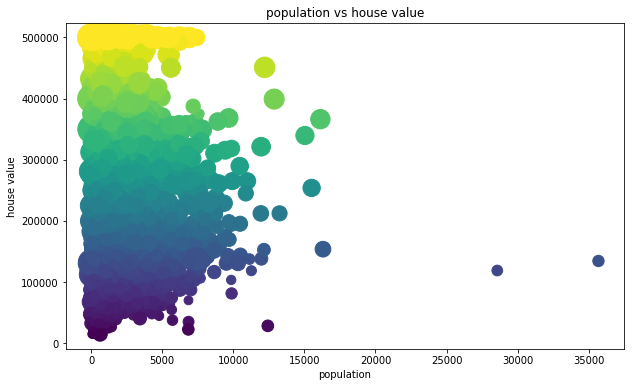

In [15]:
plt.figure(figsize=(10,6))

plt.scatter(df['population'],df['median_house_value'],c=df['median_house_value'],s=df['median_income']*50)
plt.colorbar
plt.title('population vs house value' )
plt.xlabel('population')
plt.ylabel('house value')
plt.plot()

> ### Removing outliers

In [16]:
df[df['median_house_value']>450000]['median_house_value'].value_counts().head()


500001    965
500000     27
475000      8
483300      6
466700      4
Name: median_house_value, dtype: int64

In [17]:
df=df.loc[df['median_house_value']<500001,:]

In [18]:
df=df[df['population']<25000]

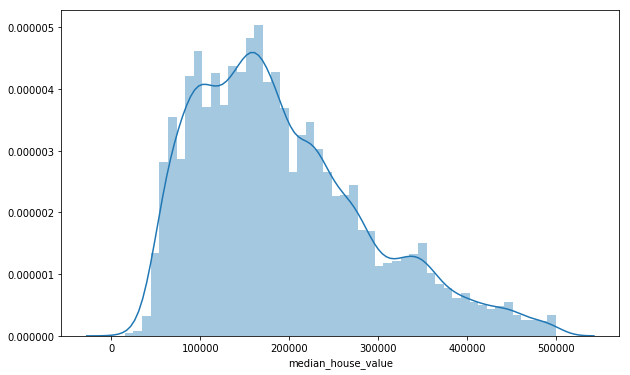

In [19]:
plt.figure(figsize=(10,6))
sns.distplot(df['median_house_value'])
plt.show()

>scatter plot on co-ordinates(latitude and longitude)

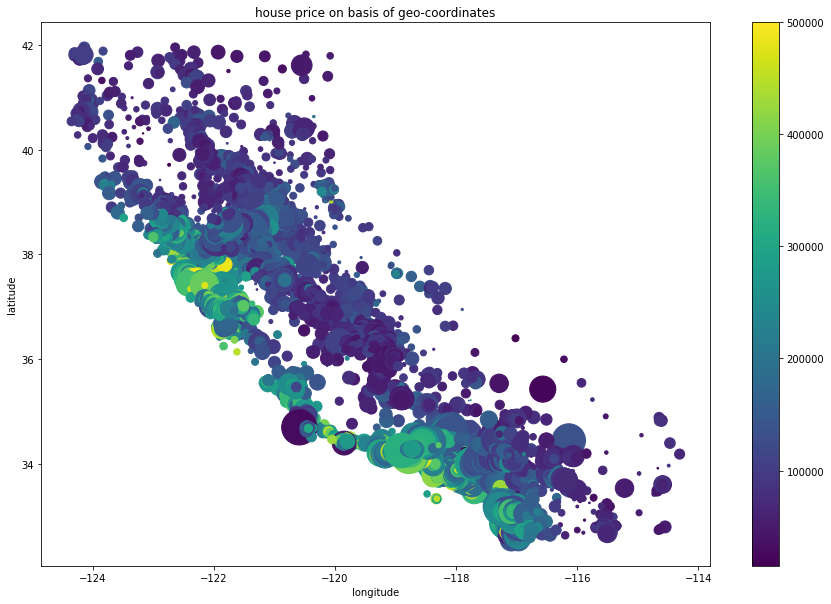

In [20]:

plt.figure(figsize=(15,10))
plt.scatter(df['longitude'],df['latitude'],c=df['median_house_value'],s=df['population']/10,cmap='viridis')
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('house price on basis of geo-coordinates')
plt.show()

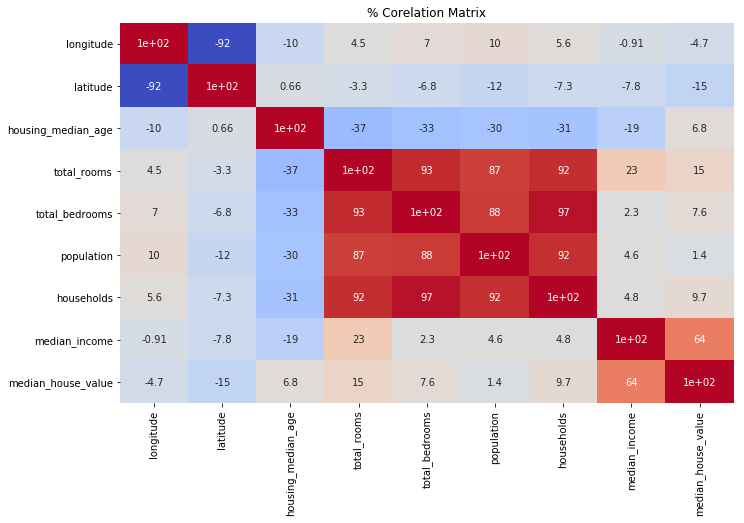

In [21]:
#corelation matrix
plt.figure(figsize=(11,7))
sns.heatmap(cbar=False,annot=True,data=df.corr()*100,cmap='coolwarm')
plt.title('% Corelation Matrix')
plt.show()


[]

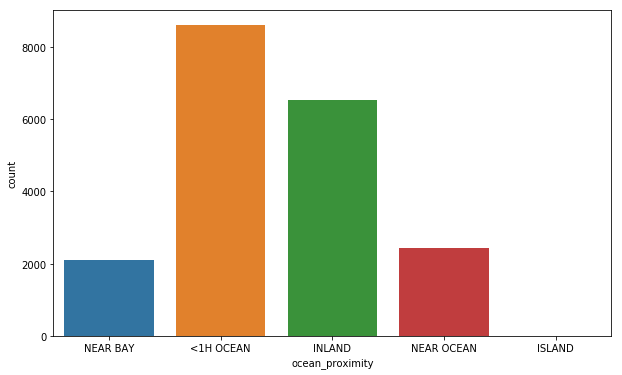

In [22]:
#barplot on ocean_proximity categories
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='ocean_proximity')
plt.plot()

[]

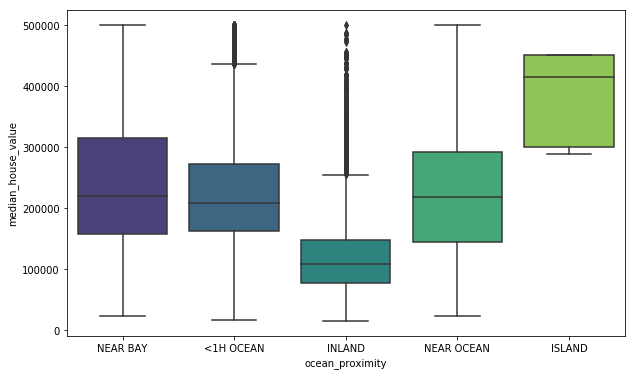

In [23]:
#boxplot of house value on ocean_proximity categories
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='ocean_proximity',y='median_house_value',palette='viridis')
plt.plot()

#### kernel density estimation of ocean_proximity vs median_house_value


In [24]:
# plt.figure(figsize=(10,6))
# sns.kdeplot(df['median_house_value'],df['median_income'],cmap='viridis',cbar=True)

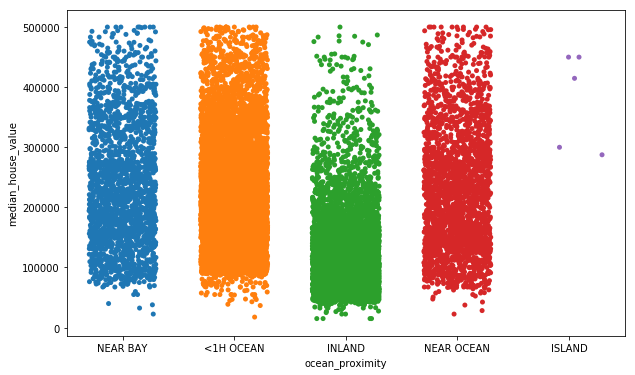

In [25]:
plt.figure(figsize=(10,6))

sns.stripplot(data=df,x='ocean_proximity',y='median_house_value',jitter=0.3)

#'INLAND CATERGORY  IN cean_proximity COLUMN  I

## preprocessing


#### Feature Selection

In [26]:
# converting ocean_proximity to dummies
df=pd.concat([pd.get_dummies(df['ocean_proximity'],drop_first=True),df],axis=1).drop('ocean_proximity',axis=1)
df['income per working population']=df['median_income']/(df['population']-df['households'])
df['bed per house']=df['total_bedrooms']/df['total_rooms']
df['h/p']=df['households']/df['population']


In [27]:

def type_building(x):
    if x<=10:
        return "new"
    elif x<=30:
        return 'mid old'
    else:
        return 'old'
df=pd.concat([df,pd.get_dummies(df['housing_median_age'].apply(type_building),drop_first=True)],axis=1)

In [28]:
x=df.drop('median_house_value',axis=1).values
y=df['median_house_value'].values

#### Tranning and Testing sampling

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

### Normalising data 

In [30]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
xtrain=ms.fit_transform(xtrain)
xtest=ms.transform(xtest)

## Feature Dimentional Reduction and Visualization


## Visualising data using PCA


In [31]:
def c_variance(x):
    total=0
    clist=[]
    for i in np.arange(0,xtrain.shape[1]):
        p=PCA(n_components=i+1)
        p.fit(x)
        total=total+p.explained_variance_ratio_[i]
        clist.append(total)
        
    return clist
x_train_variance=list(map(lambda x:x*100,c_variance(xtrain)))

### Comulative Variance Curve

Text(0.5,1,'comulative variance ratio of p.c.a components')

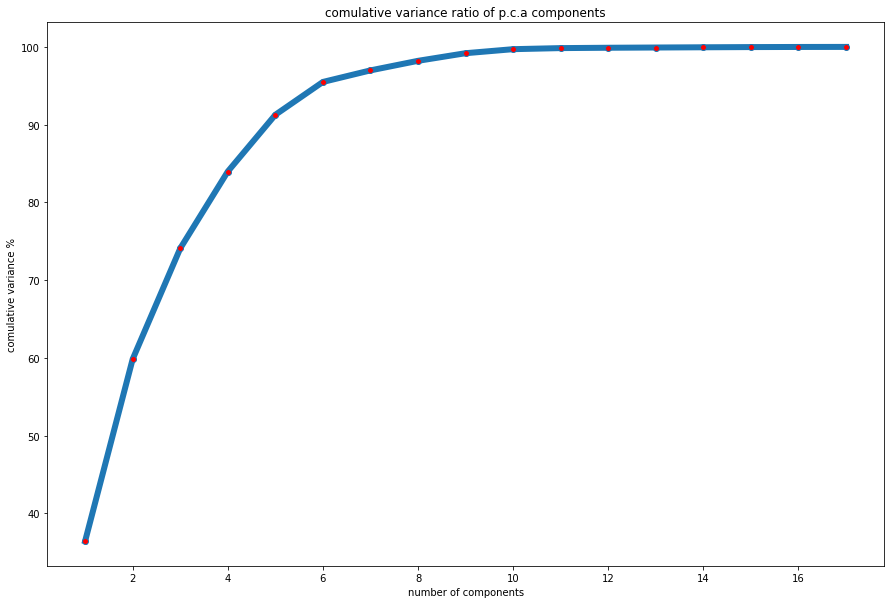

In [32]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(1,xtrain.shape[1]+1),x_train_variance,marker='o',markerfacecolor='red',lw=6)
plt.xlabel('number of components')
plt.ylabel('comulative variance %')
plt.title('comulative variance ratio of p.c.a components')


> here  we can see that with 2 principle components we get 54% variance

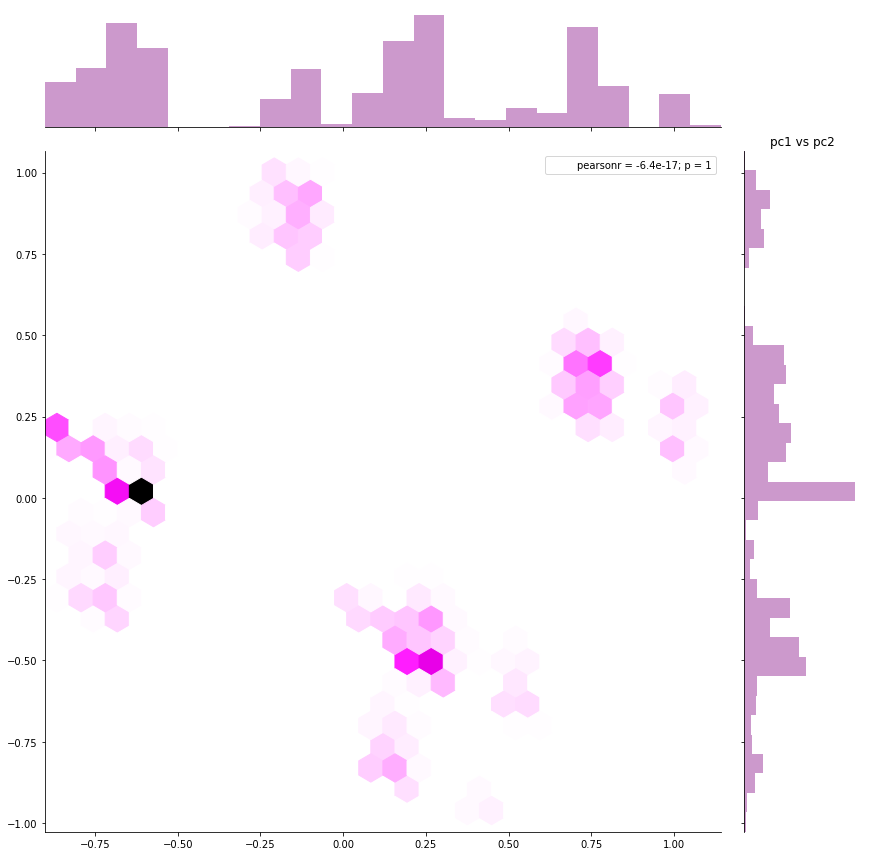

In [33]:
pca=PCA(n_components=2)
pca.fit(xtrain)
sns.jointplot(data={'pc1':pca.fit_transform(xtrain)[:,0],'pc2':pca.fit_transform(xtrain)[:,1]},x='pc1',y='pc2',size=12,kind='hex',color='purple')
plt.title('pc1 vs pc2')
plt.show()

## Clustering first two principle components
> applying K means

In [34]:
p_train=pca.fit_transform(xtrain)


In [35]:
best=[]
for i in range(1,10):
    k=KMeans(n_clusters=i)
    k.fit(xtrain)
    best.append(k.inertia_)
    

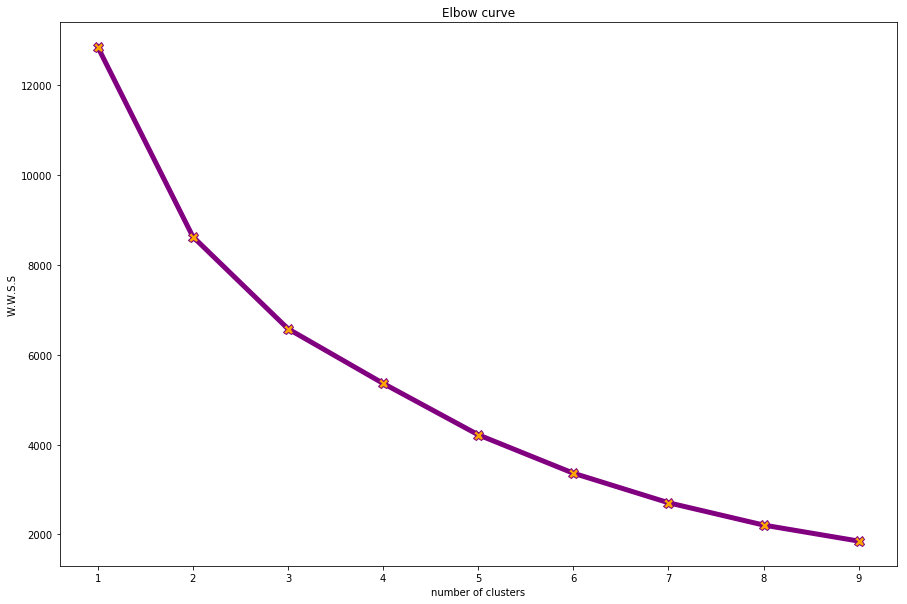

In [36]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(1,len(best)+1),best,marker='X',markerfacecolor='orange',markersize=10,lw=5,color='purple')
plt.title('Elbow curve')
plt.xlabel('number of clusters')
plt.ylabel('W.W.S.S')
plt.show()

 Here we can see that 3  is the most optimal number of clusters

In [37]:
k=KMeans(n_clusters=4)
kpred=k.fit_predict(xtrain)

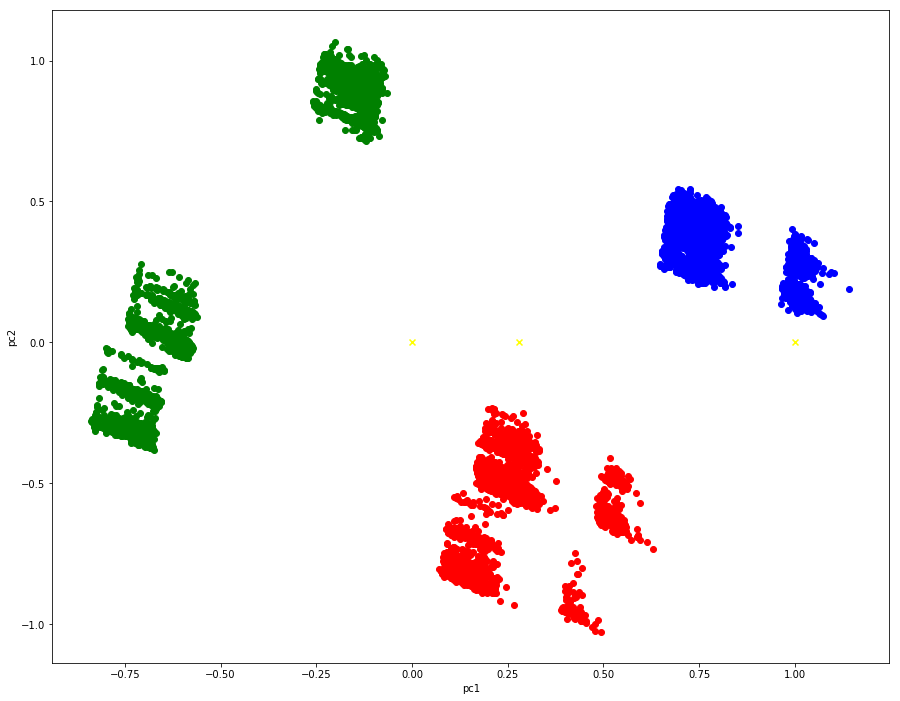

In [38]:
plt.figure(figsize=(15,12))
color=['red','green','blue','pink']
for i in range(3):
    plt.scatter(p_train[kpred==i][:,0],p_train[kpred==i][:,1],c=color[i])
    plt.scatter(k.cluster_centers_[i,0],k.cluster_centers_[i,1],c='yellow',marker='x')
    plt.xlabel('pc1')
    plt.ylabel('pc2')

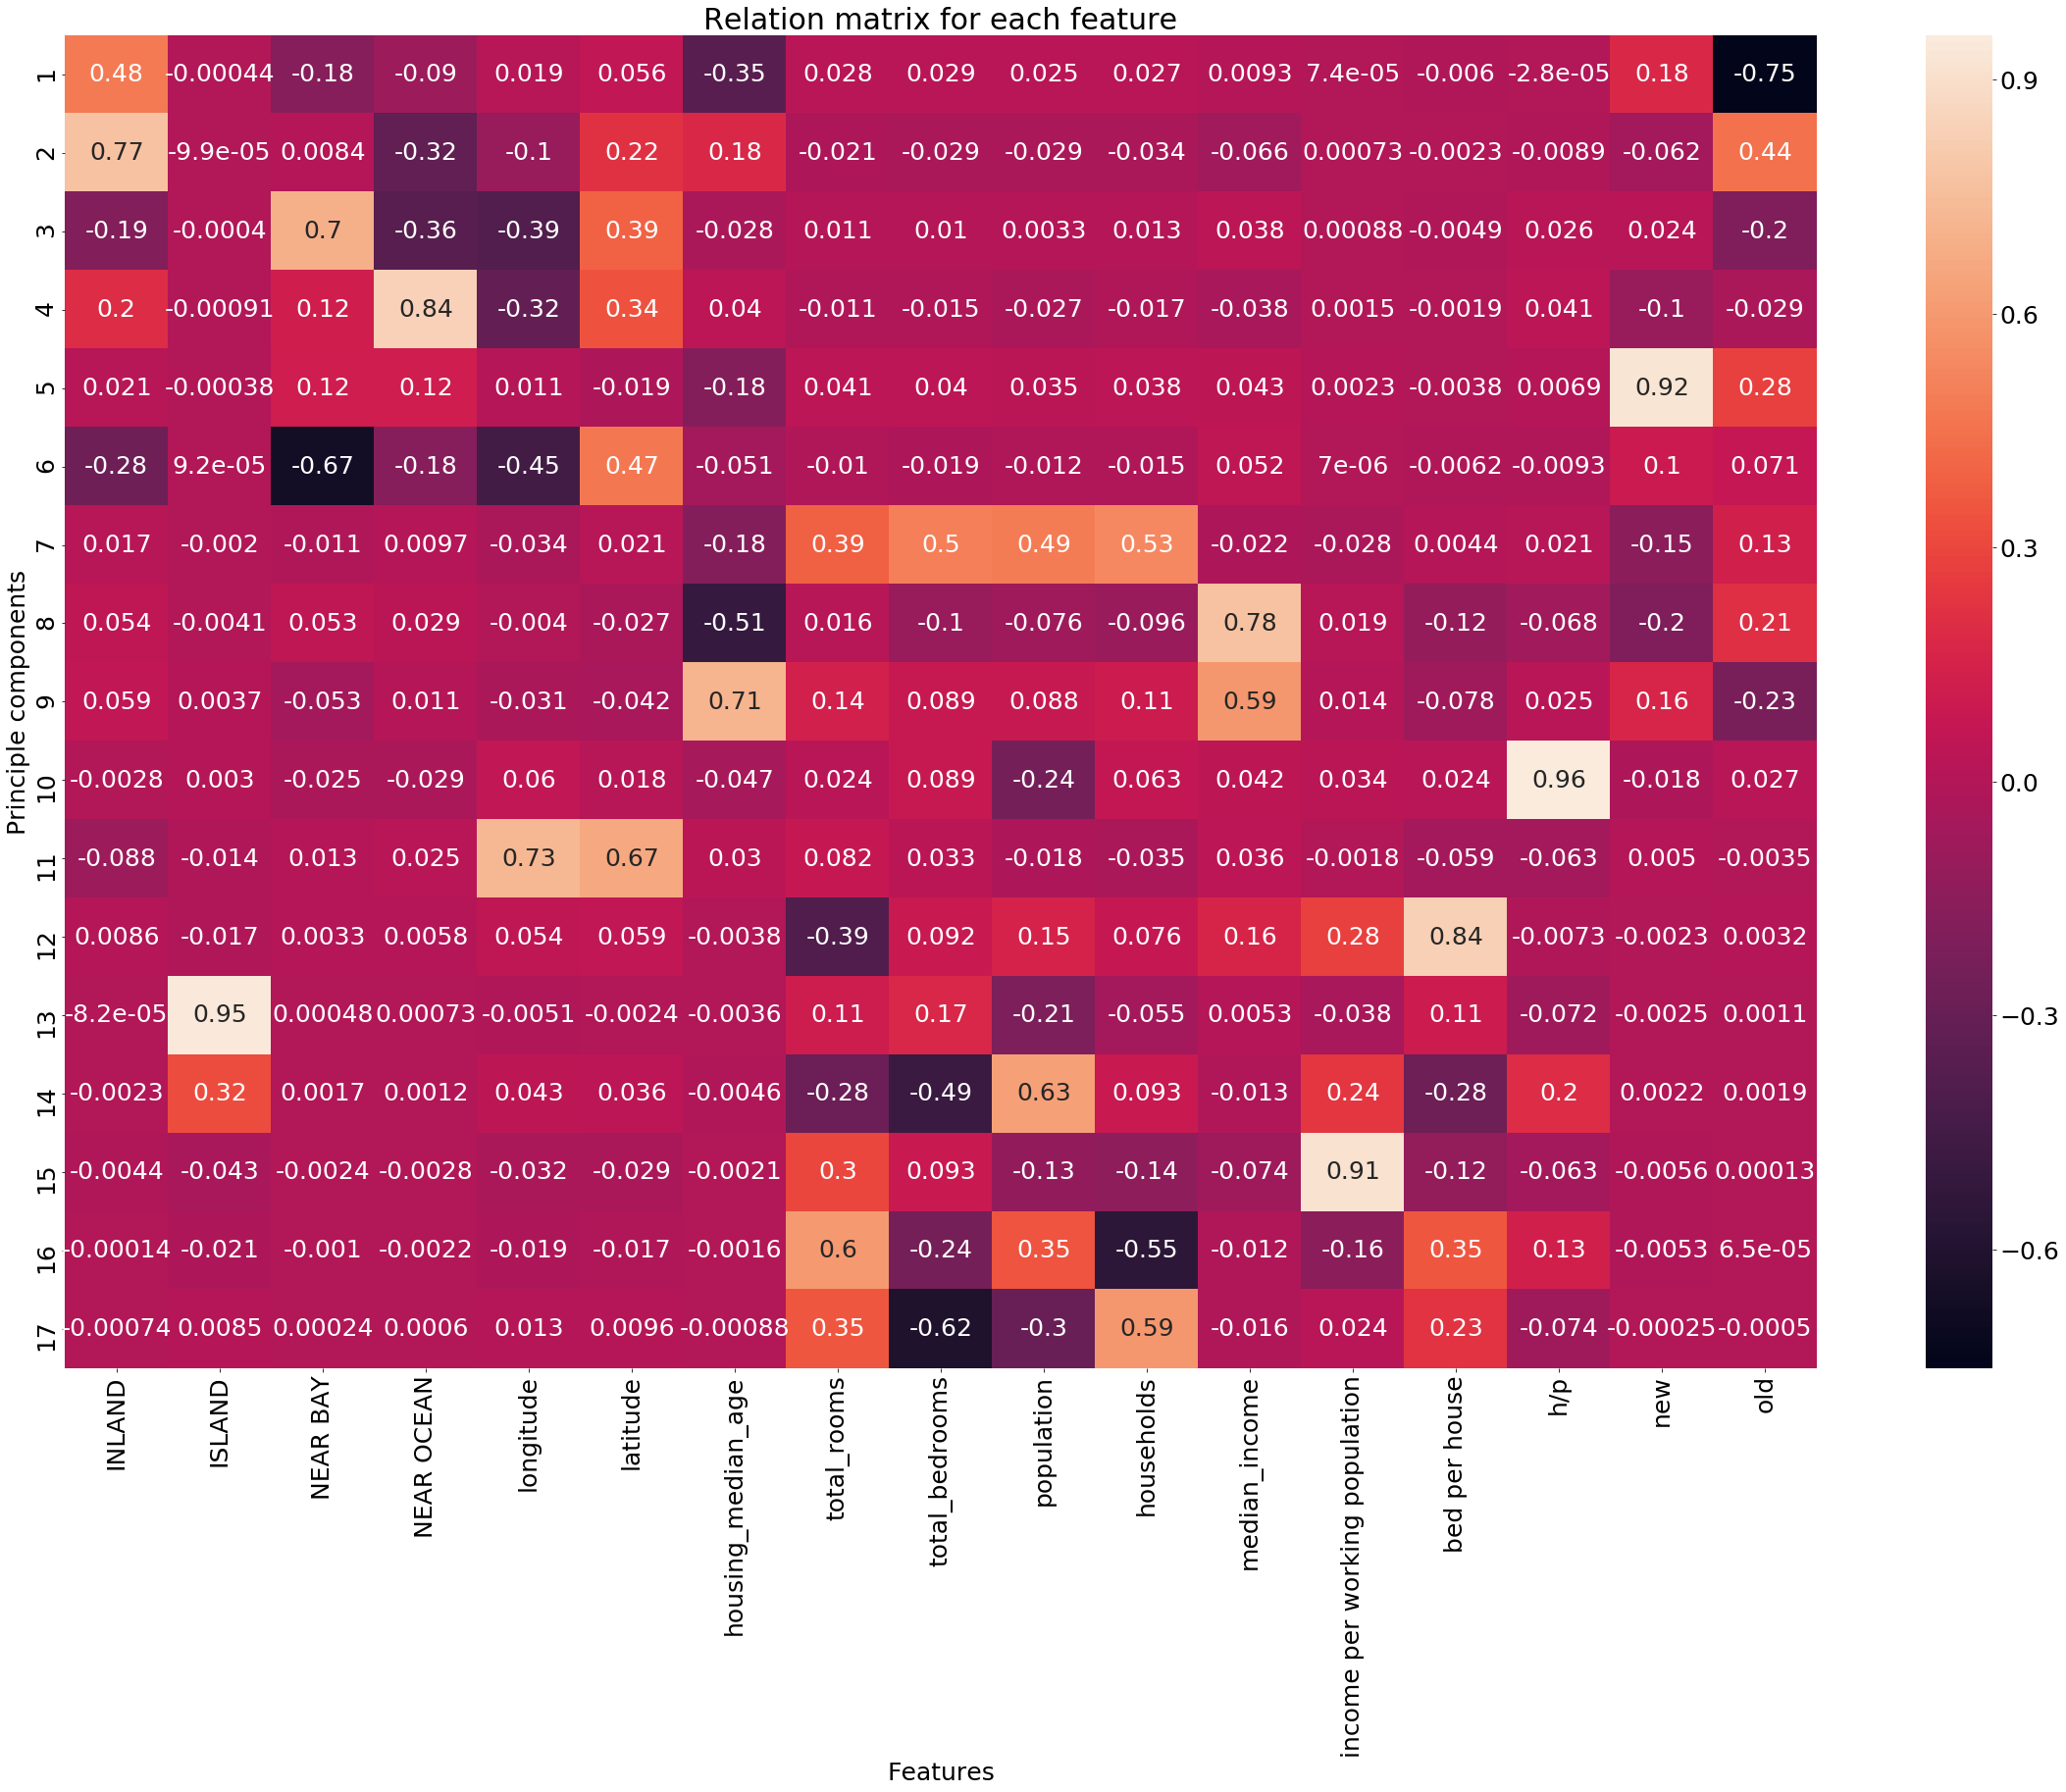

In [39]:
matplotlib.rcParams.update({'font.size': 25})
pca=PCA(n_components=None)
pca.fit(xtrain)
plt.figure(figsize=(40,25))
sns.heatmap(pca.components_,annot=True,xticklabels=df.drop('median_house_value',axis=1).columns,yticklabels=[str(i) for i in range(1,len(df.columns))])
plt.xlabel('Features')
plt.ylabel('Principle components')
plt.title('Relation matrix for each feature')
plt.show()
matplotlib.rcParams.update({'font.size': 12})

# Modelling

### Linear regression  with most corelated features

In [40]:
def regresssor_model(x,y,estimator):
   
    regressor=estimator()
    regressor.fit(x,y)
    lr_rmse=np.sqrt(mean_squared_error(y,regressor.predict(x)))
    cv_regressor=cross_val_score(cv=10,X=x,y=y,estimator=regressor,scoring='r2')
    print('The cross validated accuracy  - '+str(100*cv_regressor.mean()))
    print('The corss validated variance is - '+str(100*cv_regressor.std()))
    return regressor

def evaluate(ypred,ytest,regressor):
    plt.figure(figsize=(15,8))
    plt.xlabel('(ytest) - (ypred)')
    plt.ylabel('frequency')
    plt.title('residual plot')
    plt.hist(ytest-ypred)
    print("root mean squared error for test data   is "+str(np.sqrt(mean_squared_error(ytest,ypred))))
    plt.show()
# plt.show()


#polynomial regression with all features
def to_poly(degree,xtrain,xtest):
    poly=PolynomialFeatures(degree=degree)
    X=poly.fit_transform(xtrain)
    x=poly.fit_transform(xtest)
    return (X,x)

Linear regression with most co related features
The cross validated accuracy  - 41.3506511798
The corss validated variance is - 1.92355000996
root mean squared error for test data   is 76318.4429857


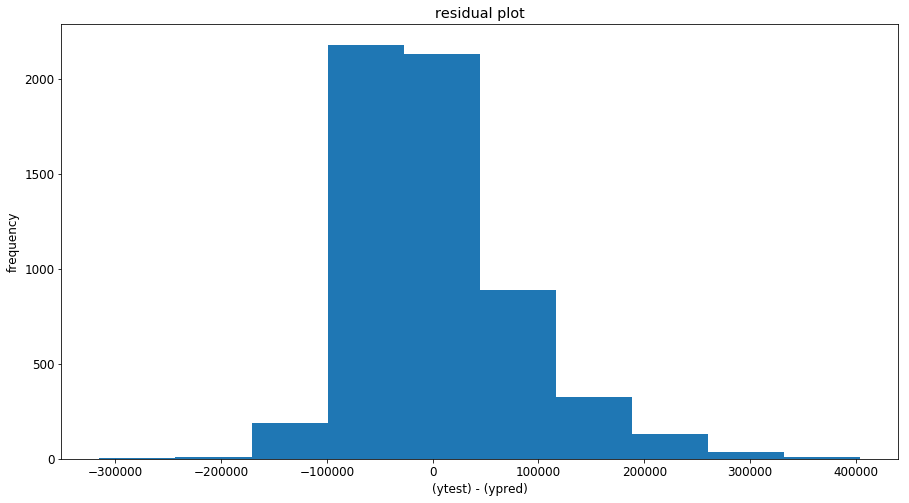

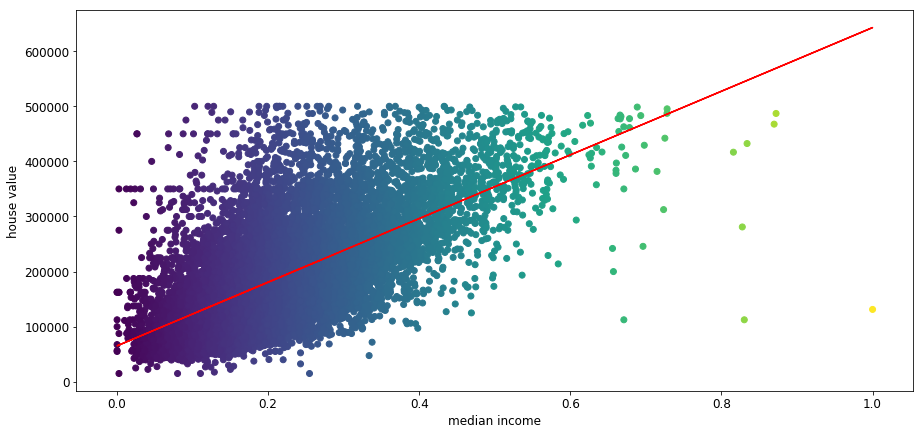

In [41]:
print('Linear regression with most co related features')
l=regresssor_model(xtrain[:,[11]],ytrain,LinearRegression)
evaluate(l.predict(xtest[:,[11]]),ytest,l)
plt.figure(figsize=(15,7))
plt.scatter(xtrain[:,11],ytrain,c=xtrain[:,11])
plt.plot(xtrain[:,11],l.predict(xtrain[:,11:12]),color='red')
plt.xlabel('median income')
plt.ylabel('house value')
plt.show()

### Linear regression  with all features

Linear regression with all features
The cross validated accuracy  - 63.2759043408
The corss validated variance is - 1.81524217696
root mean squared error for test data   is 58680.2813308


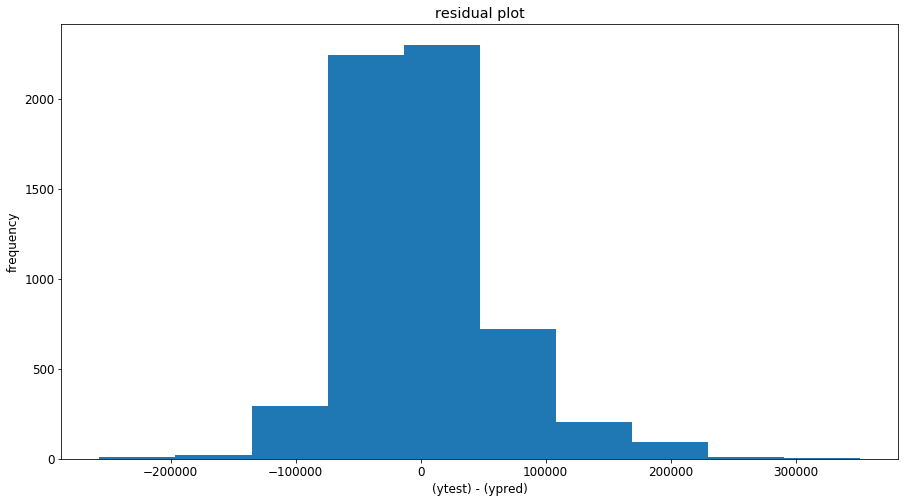

In [42]:
print('Linear regression with all features')
l=regresssor_model(xtrain,ytrain,LinearRegression)
evaluate(l.predict(xtest),ytest,l)

### Polynomial regression with most corelated features

The cross validated accuracy  - 41.350961353
The corss validated variance is - 1.89656770946
root mean squared error for test data   is 76253.7675028


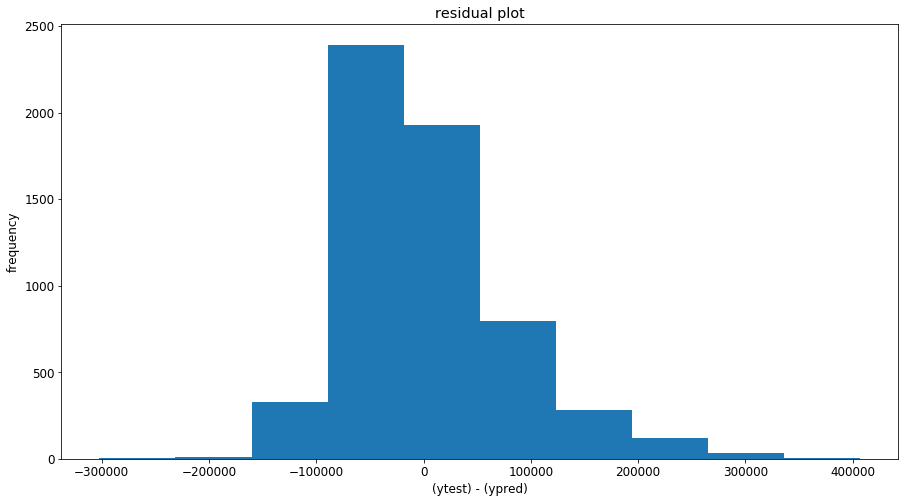

In [43]:
xtrain_poly,xtest_poly=to_poly(2,xtrain[:,11:12],xtest[:,11:12])
l=regresssor_model(xtrain_poly,ytrain,LinearRegression)
evaluate(l.predict(xtest_poly),ytest,l)

### Polynomial regression with all features

The cross validated accuracy  - -1.3145141168e+18
The corss validated variance is - 3.91337672799e+18
root mean squared error for test data   is 5.70992976394e+12


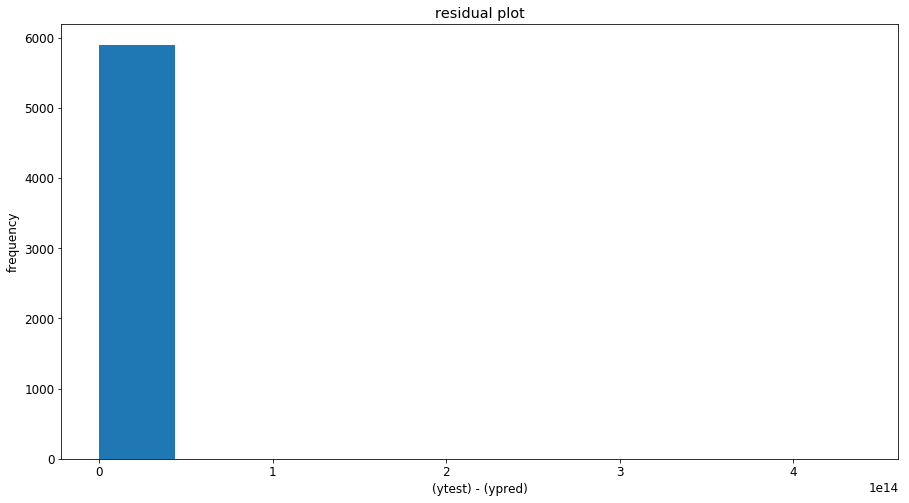

In [44]:
xtrain_poly,xtest_poly=to_poly(3,xtrain,xtest)
l=regresssor_model(xtrain_poly,ytrain,LinearRegression)
evaluate(l.predict(xtest_poly),ytest,l)

## Here we can see that polynomial model is having high variance and hence it's bad model

## Stepwise Regression (backward elimination)
- for 10% significance level 
- checking pvalues

In [45]:
xtrain_ols=np.append(np.ones(xtrain.shape[0]).reshape(xtrain.shape[0],1),xtrain,axis=1)

In [46]:
xtest_ols=np.append(np.ones(xtest.shape[0]).reshape(xtest.shape[0],1),xtest,axis=1)

#### Pvalues

In [47]:
def backward_elimination(x,y_dependent,sl):
    var=np.arange(x.shape[1])
    x_ols_array=x[:,var]
    regressor=sm.OLS(y_dependent,x_ols_array).fit()
    for i in range(sum(regressor.pvalues>sl)):
        if sum(regressor.pvalues>sl)>0:
            arg=regressor.pvalues.argmax()
            var=np.delete(var,arg)
            x_ols_array=x[:,var]
            regressor=sm.OLS(y_dependent,x_ols_array).fit()
    return (var[:],regressor)

features,regressor=backward_elimination(xtrain_ols,ytrain,0.10)

In [48]:
features

array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [49]:
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     1508.
Date:                Sat, 16 Jun 2018   Prob (F-statistic):               0.00
Time:                        09:16:15   Log-Likelihood:            -1.7069e+05
No. Observations:               13771   AIC:                         3.414e+05
Df Residuals:                   13754   BIC:                         3.415e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.824e+05   1.31e+04     13.883      0.000    1.57e+05    2.08e+05
x1         -3.559e+04   1793.115    -19.846      0.000   -3.91e+04   -3.21e+04
x2          1.289e+05   2.93e+04      4.400      0.000    7.15e+04    1.86e+05
x3         -1.083e+04   1964.619     -5.511      0.000   -1.47e+04   -6975.460
x4          -2.41e+05   1.02e+04    -23.582      0.000   -2.61e+05   -2.21e+05
x5          -2.12e+05   9458.003    -22.418      0.000   -2.31e+05   -1.93e+05
x6          6.482e+04   4546.000     14.259      0.000    5.59e+04    7.37e+04
x7         -1.004e+05   3.69e+04     -2.719      0.007   -1.73e+05    -2.8e+04
x8          2.183e+05   4.16e+04      5.246      0.000    1.37e+05       3e+05
x9          5.624e+04   3.11e+04      1.808      0.071   -4744.043    1.17e+05
x10        -1.121e+05   4.29e+04     -2.616      0.009   -1.96e+05   -2.81e+04
x11         5.783e+05   6635.549     87.150      0.000    5.65e+05    5.91e+05
x12        -1.852e+05   3.17e+04     -5.836      0.000   -2.47e+05   -1.23e+05
x13         2.549e+05   3.03e+04      8.418      0.000    1.96e+05    3.14e+05
x14         3.288e+05   1.19e+04     27.618      0.000    3.05e+05    3.52e+05
x15         4166.0002   2316.451      1.798      0.072    -374.559    8706.560
x16        -8884.5818   1942.974     -4.573      0.000   -1.27e+04   -5076.088
==============================================================================
Omnibus:                     2447.072   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9259.221
Skew:                           0.856   Prob(JB):                         0.00
Kurtosis:                       6.634   Cond. No.                         181.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
np.sqrt(mean_squared_error(ytest,regressor.predict(xtest_ols[:,features])))

58670.611848318957

### Regularization

- Here  apply base l1 and l2 techniques to check the basic accuracy

### Coefficients comparison for linear regression

Text(0.5,1,'coeff graph')

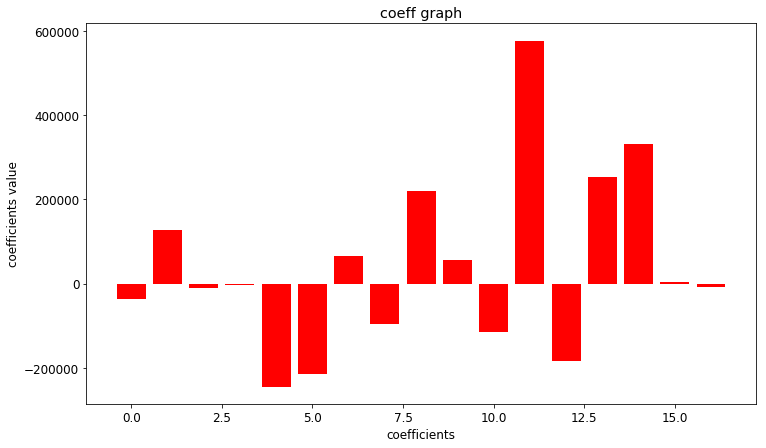

In [51]:
l=LinearRegression()
plt.figure(figsize=(12,7))
l.fit(xtrain,ytrain)
plt.bar(np.arange(len(l.coef_)),l.coef_,color='red')
plt.xlabel('coefficients')
plt.ylabel('coefficients value')
plt.title('coeff graph')

### lasso

The cross validated accuracy  - 63.2818045473
The corss validated variance is - 1.80489105257
root mean squared error for test data   is 58685.2060495


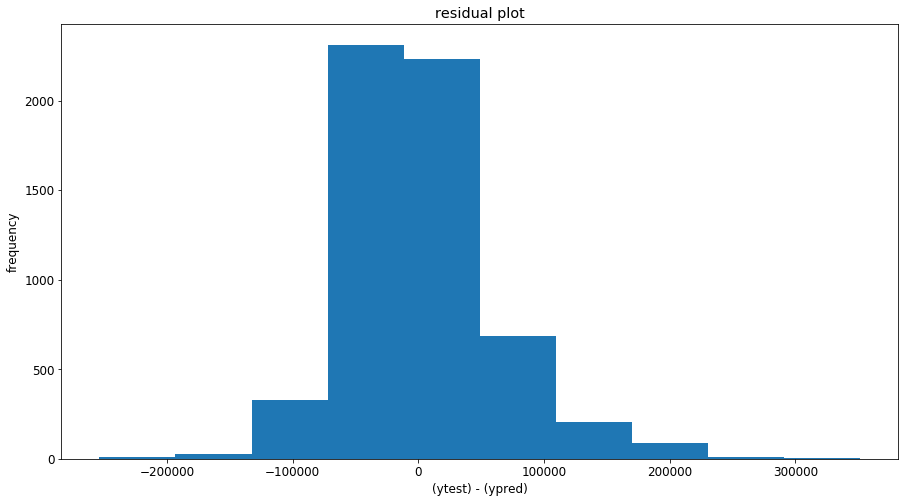

[]

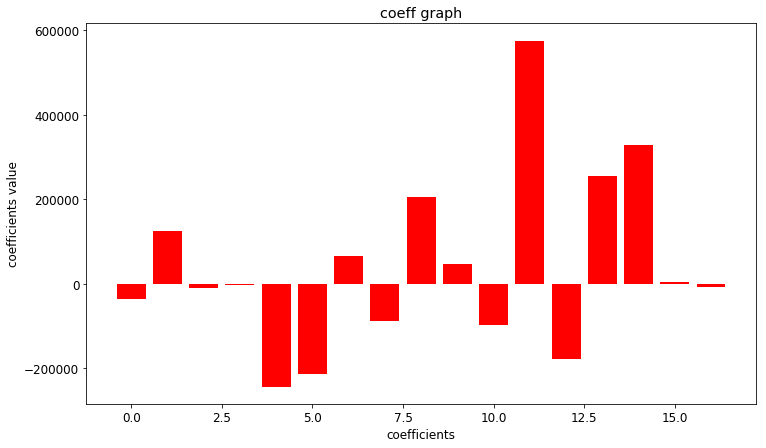

In [52]:
l=regresssor_model(xtrain,ytrain,Lasso)

evaluate(l.predict(xtest),ytest,l)
plt.figure(figsize=(12,7))

plt.bar(np.arange(len(l.coef_)),l.coef_,color='red')
plt.xlabel('coefficients')
plt.ylabel('coefficients value')
plt.title('coeff graph')
plt.plot()

### Elastic nets

The cross validated accuracy  - 15.1480336203
The corss validated variance is - 0.546054426139
root mean squared error for test data   is 91407.1108599


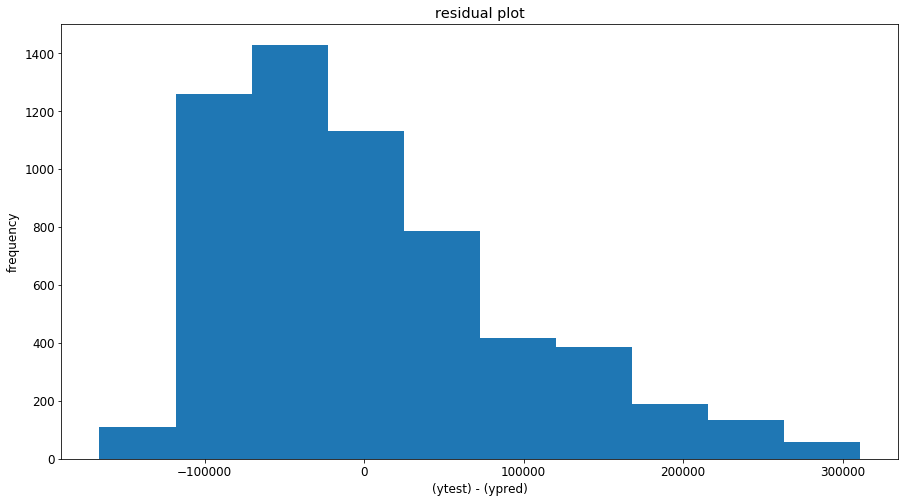

Text(0.5,1,'coeff graph')

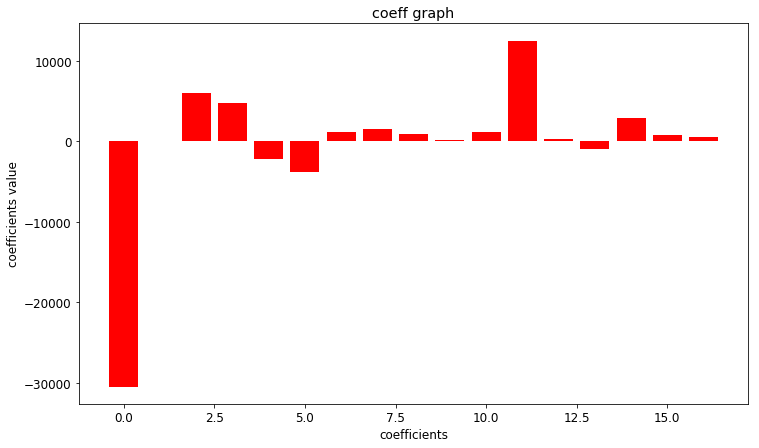

In [53]:
l=regresssor_model(xtrain,ytrain,ElasticNet)
evaluate(l.predict(xtest),ytest,l)
plt.figure(figsize=(12,7))
plt.bar(np.arange(len(l.coef_)),l.coef_,color='red')
plt.xlabel('coefficients')
plt.ylabel('coefficients value')
plt.title('coeff graph')

## Ridge

The cross validated accuracy  - 63.3626714305
The corss validated variance is - 1.594597959
root mean squared error for test data   is 58797.9857014


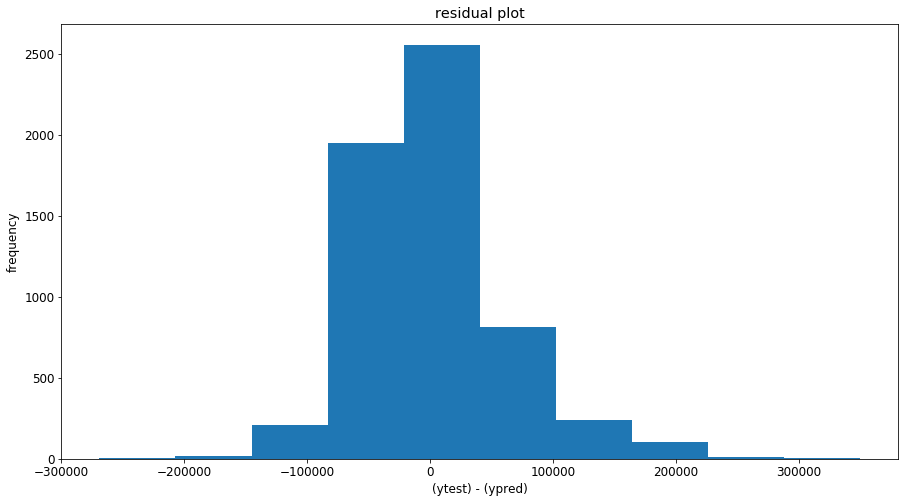

Text(0.5,1,'coeff graph')

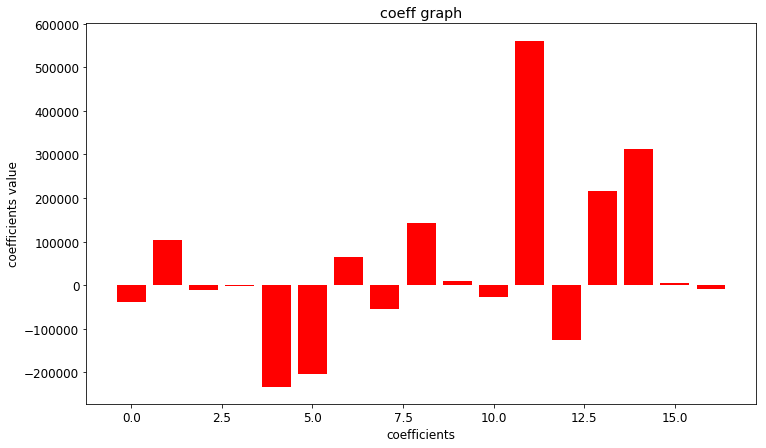

In [54]:
l=regresssor_model(xtrain,ytrain,Ridge)
evaluate(l.predict(xtest),ytest,l)
plt.figure(figsize=(12,7))
plt.bar(np.arange(len(l.coef_)),l.coef_,color='red')
plt.xlabel('coefficients')
plt.ylabel('coefficients value')
plt.title('coeff graph')

## CART TREES(Decision Trees)

In [55]:
dt=regresssor_model(xtrain,ytrain,DecisionTreeRegressor)
dt.fit(xtrain,ytrain)
print('mean squared errror is',end='\t-')
np.sqrt(mean_squared_error(ytest,dt.predict(xtest)))


The cross validated accuracy  - 54.069410827
The corss validated variance is - 3.11257375302
mean squared errror is	-

64733.285399378772

### Cross Validation

In [56]:
cv=cross_val_score(dt,xtrain,ytrain,scoring='r2',cv=10)
cv.std()
cv.mean()

0.54373764165940919

### Parameter Tuning

In [57]:
params=[{
            
            'max_depth':[2,3,4,5,6,10,20,30,40,50,60,70,100],
            'min_samples_split':[2,3,4,7,10,12],
            'min_samples_leaf' :[1,3,5,10,15,20,25],
            'max_features':['sqrt','log2'],
            
        }
        ]

from sklearn.model_selection import GridSearchCV
gc=GridSearchCV(dt,params,cv=10,scoring='r2',n_jobs=-1)
gc.fit(xtrain,ytrain)
gc.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=30, max_features='log2',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=20,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [58]:
gc.best_score_

0.65575812437770598

In [59]:
dt=gc.best_estimator_
dt.fit(xtrain,ytrain)
print('root mean squared error')
np.sqrt(mean_squared_error(ytest,dt.predict(xtest)))

root mean squared error


57935.553073926501

#### Feature Importance by decision trees 

Text(0.5,1,'feature importance')

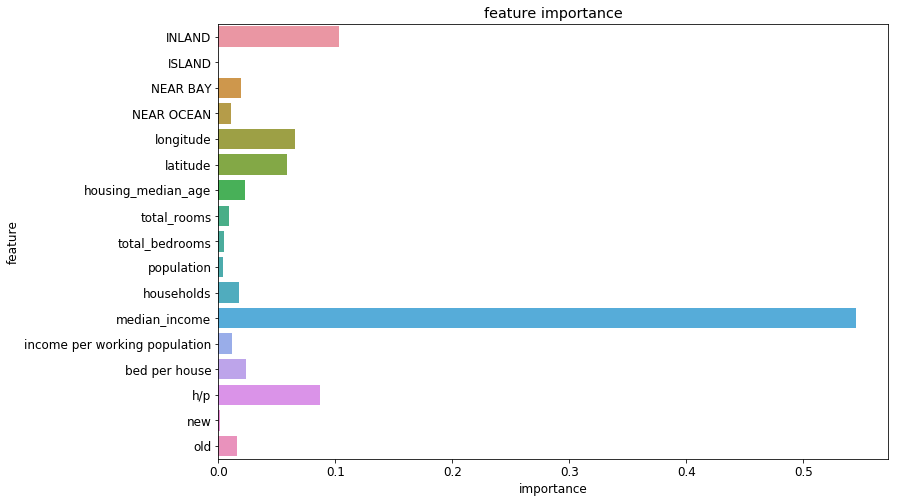

In [60]:
plt.figure(figsize=(12,8))
data=pd.DataFrame({'feature':df.columns[df.columns!='median_house_value'].values,"importance":dt.feature_importances_})
sns.barplot(data=data,y='feature',x='importance')
plt.title('feature importance')

### Esemble Learning 

### Random forest

In [61]:
rg=RandomForestRegressor(n_estimators=30)
rg.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Root mean square value

In [62]:
print(np.sqrt(mean_squared_error(ytest,rg.predict(xtest))))

46776.364402


R Squared

In [63]:
print(rg.score(xtest,ytest))

0.777989563657


(array([  3.00000000e+00,   1.40000000e+01,   8.30000000e+01,
          5.42000000e+02,   3.61000000e+03,   1.20900000e+03,
          3.15000000e+02,   9.50000000e+01,   2.50000000e+01,
          6.00000000e+00]),
 array([-265013.33333333, -209435.        , -153856.66666667,
         -98278.33333333,  -42700.        ,   12878.33333333,
          68456.66666667,  124035.        ,  179613.33333333,
         235191.66666667,  290770.        ]),
 <a list of 10 Patch objects>)

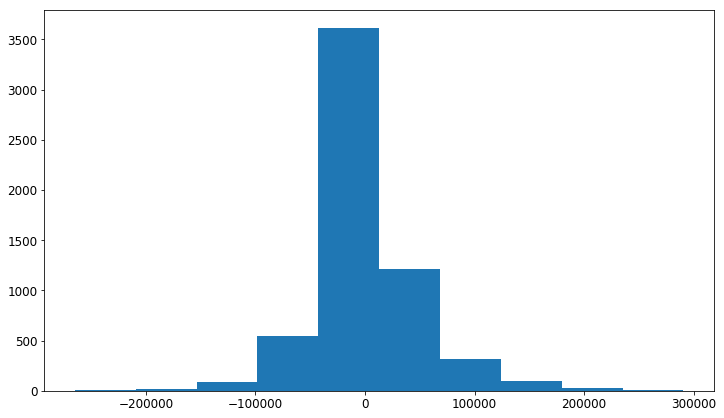

In [64]:
plt.figure(figsize=(12,7))
plt.hist(ytest-rg.predict(xtest))

### Grid Search

In [65]:
params=[{
            'n_estimators':[20,30,70,50,100,200,300,400,600,650,630,680],
            'max_depth':[10,20,30,40,50,60,70,100],
            'min_samples_split':[2,3,4,5,10],
            'min_samples_leaf' :[1,2,5,7,10],
            'bootstrap':[True,False],
            'max_features':['sqrt','auto']
            
            
        }
]

In [66]:
# gc=GridSearchCV(rg,params,cv=2,scoring='r2')
# gc.fit(xtrain,ytrain)


### Model with Best HyperParameter

In [67]:
rg=RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=70,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=630, n_jobs=1,
           oob_score=False, verbose=0, warm_start=False)
rg.fit(xtrain,ytrain)
np.sqrt(mean_squared_error(ytest,rg.predict(xtest)))

46017.625157834627

Root Mean Sqared Error

In [68]:
np.sqrt(mean_squared_error(ytest,rg.predict(xtest)))

46017.625157834627

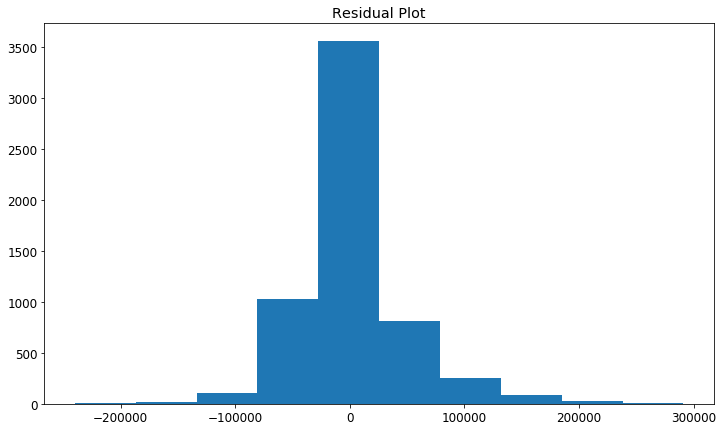

In [69]:
plt.figure(figsize=(12,7))
plt.title('Residual Plot')
plt.hist(ytest-rg.predict(xtest))
plt.show()

R Squared

In [70]:
rg.score(xtest,ytest)

0.78513342237146255

### Best Featureby Random Forest

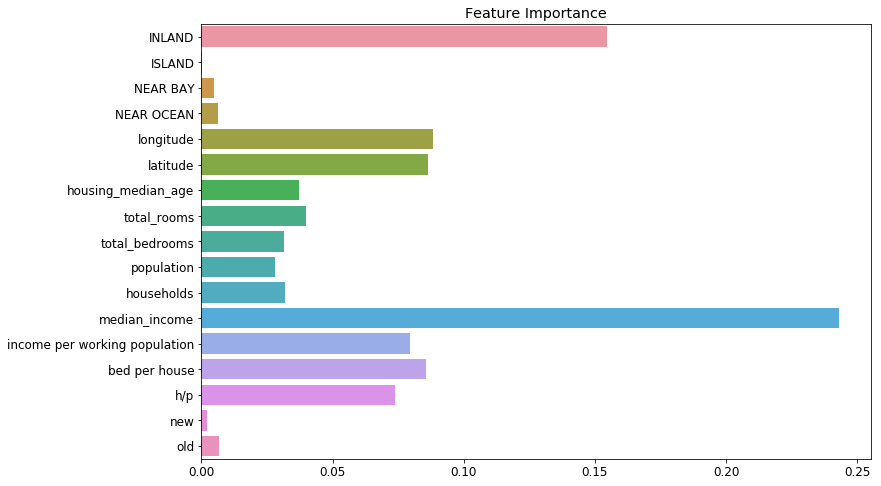

In [71]:
plt.figure(figsize=(12,8))
plt.title('Feature Importance')

sns.barplot(data={'importance':rg.feature_importances_,'feature':df.columns[df.columns!='median_house_value']},y='feature',x='importance')

rmse value is 44968.6935849
r squared value is 0.794817175607


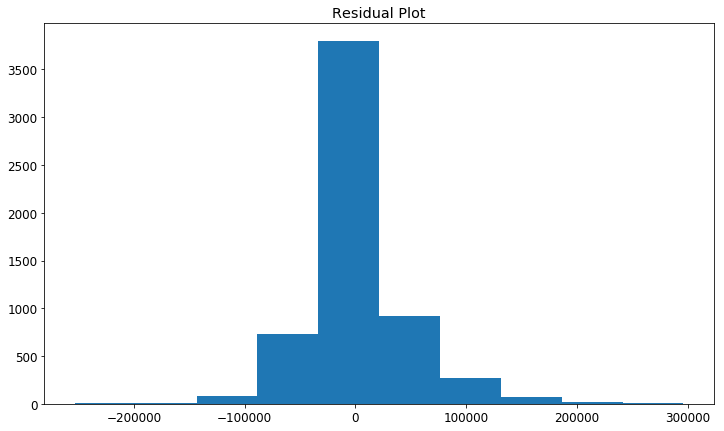

In [152]:
rg=RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=100,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=630, n_jobs=1,
           oob_score=False, verbose=0, warm_start=False)
rg.fit(xtrain[:,[0,4,5,6,7,11,12,13,14]],ytrain)
print('rmse value is '+str(np.sqrt(mean_squared_error(ytest,rg.predict(xtest[:,[0,4,5,6,7,11,12,13,14]])))))
print('r squared value is '+str(rg.score(xtest[:,[0,4,5,6,7,11,12,13,14]],ytest)))

plt.figure(figsize=(12,7))
plt.title('Residual Plot')
plt.hist(ytest-rg.predict(xtest[:,[0,4,5,6,7,11,12,13,14]]))
plt.show()

In [141]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(rg,xtrain[:,[0,4,5,6,7,11,12,13,14]],ytrain,cv=5,scoring='r2')

In [142]:
cv.mean() 

0.78665577486864646

In [143]:
cv.std()

0.0041675540542317245

## Fitting  Random forest with best feature and visualizing

In [144]:
rg=RandomForestRegressor(n_estimators=400)
rg.fit(xtrain[:,11:12],ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [145]:
x_t=np.arange(min(xtest[:,11]),max(xtest[:,11]),0.005)
x_t=x_t.reshape(len(x_t),1)


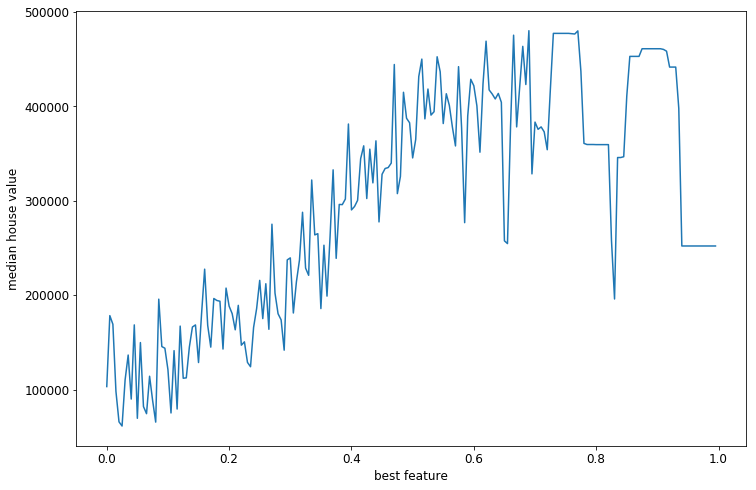

In [146]:
plt.figure(figsize=(12,8))
plt.xlabel("best feature")
plt.ylabel("median house value")
plt.plot(x_t,rg.predict(x_t))

Hence we can conclude that Random forest could be the best model because of low mean squred error(root) and high r squared
